In [30]:
%load_ext autoreload
%autoreload 2

import numpy as np
import camb
import healpy as hp
import os
from cosmology import Cosmology
import time

#GLASS modules
import glass.fields
import glass.points
import glass.shapes
import glass.lensing
import glass.observations
import glass.galaxies
import glass.ext.camb

import matplotlib.pyplot as plt

In [32]:
#define hyperparameters
nbins = 1
bz = 1.2
phz_sigma_0 = 0.03
h = 0.7
Oc = 0.25
Ob = 0.05
dx = 500.0
zmax = 1.0

n_arcmin2 = 7.
nside = 512
sigma_e = 0.3

lmax = nside

In [33]:
pars = camb.set_params(H0=100*h, omch2=Oc*h**2, ombh2=Ob*h**2)

In [34]:
cosmo = Cosmology.from_camb(pars)

In [35]:
shells = glass.shells.distance_grid(cosmo, 0., zmax, dx=dx)

weights = glass.shells.tophat_windows(shells, weight=glass.ext.camb.camb_tophat_weight)

In [36]:
cls = glass.ext.camb.matter_cls(pars, lmax, weights)

In [37]:
gls = glass.fields.lognormal_gls(cls, nside=nside, lmax=lmax, ncorr=3)

In [42]:
matter = glass.fields.generate_lognormal(gls, nside, ncorr=3)

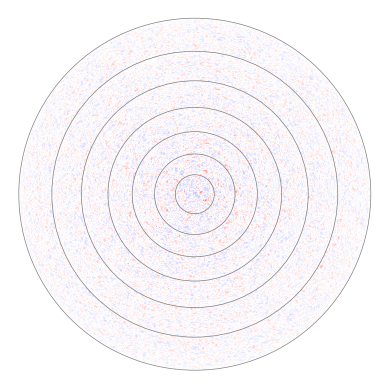

In [39]:
n = 2000
zend = 1.05*shells[-1]
x, y = np.mgrid[-zend:zend:1j*n, -zend:zend:1j*n]
z = np.hypot(x, y)
grid = np.full(z.shape, np.nan)

# set up the plot
ax = plt.subplot(111)
ax.axis('off')

# simulate and project an annulus of each matter shell onto the grid
for i, delta_i in enumerate(matter):
    zmin, zmax = shells[i], shells[i+1]
    g = (zmin <= z) & (z < zmax)
    zg = np.sqrt(1 - (z[g]/zmax)**2)
    theta, phi = hp.vec2ang(np.transpose([x[g]/zmax, y[g]/zmax, zg]))
    grid[g] = hp.get_interp_val(delta_i, theta, phi)
    ax.add_patch(plt.Circle((0, 0), zmax/zend, fc='none', ec='k', lw=0.5, alpha=0.5, zorder=1))

# show the grid of shells
ax.imshow(grid, extent=[-1, 1, -1, 1], zorder=0,
          cmap='bwr', vmin=-2, vmax=2)

# show the resulting plot
plt.show()

In [40]:
matter

<generator object generate_lognormal at 0x7fe6399bc5f0>

In [44]:
next(matter).shape

(3145728,)

In [45]:
hp.nside2npix(nside)

3145728

In [46]:
shells

array([0.        , 0.12007904, 0.24791426, 0.38537727, 0.53470702,
       0.69860183, 0.88034248, 1.08395796])